In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200521_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200521_P60

## Si II 6355

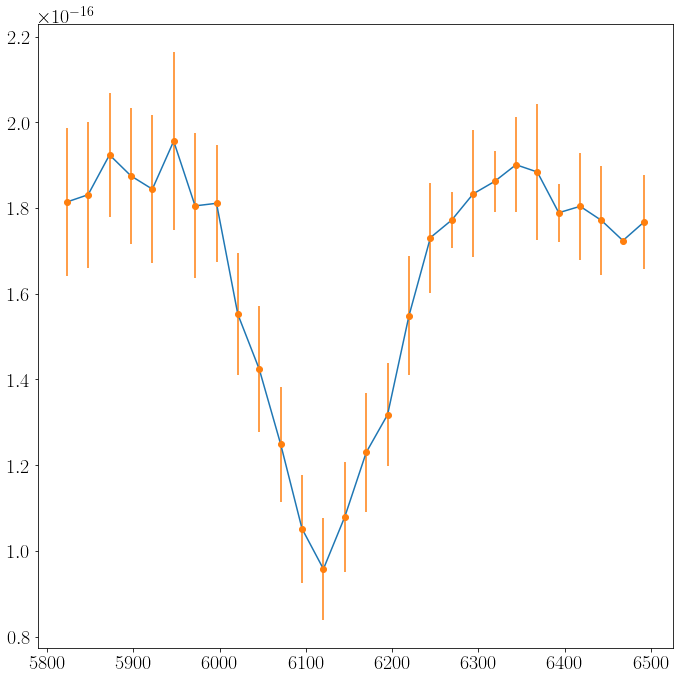

In [3]:
Spec1.plot_line_region(5800, 6500)

In [4]:
Spec1.add_line('SiII_6355', 5950, 6400, lines=[6371.359, 6347.103])

18 points within 5950.00 and 6400.00 angstroms.


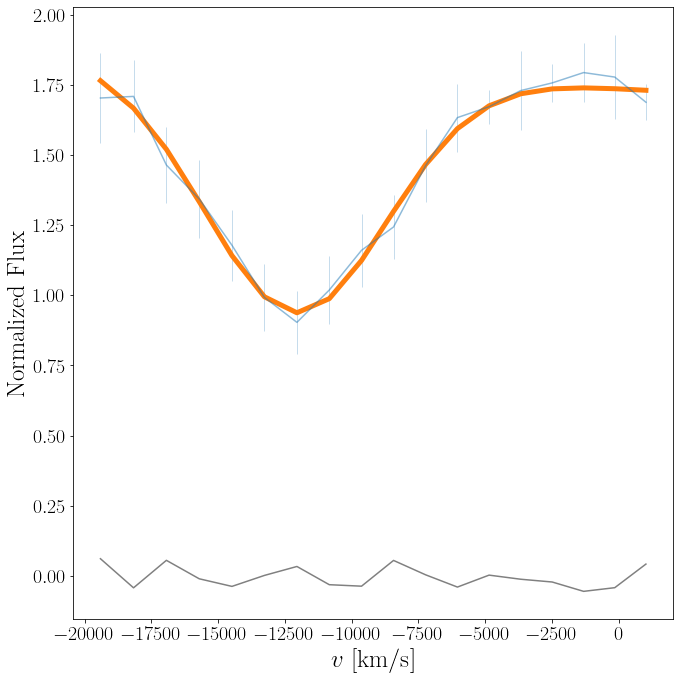

LS estimation:
Velocity pvf: -11521 km/s


In [5]:
Spec1.line['SiII_6355'].LS_estimator()

  8%|▊         | 3800/50000 [02:27<29:50, 25.80it/s]  


MCMC results:
Velocity pvf: -11362 pm 108 km/s


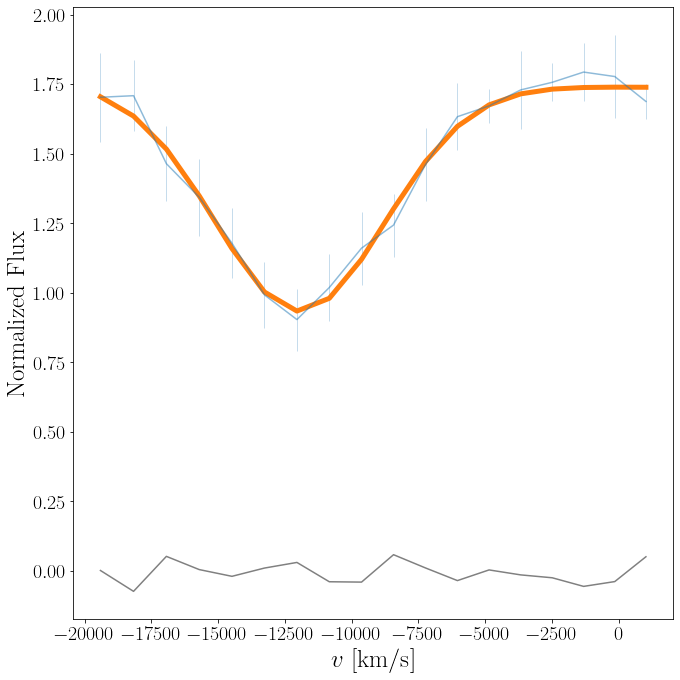

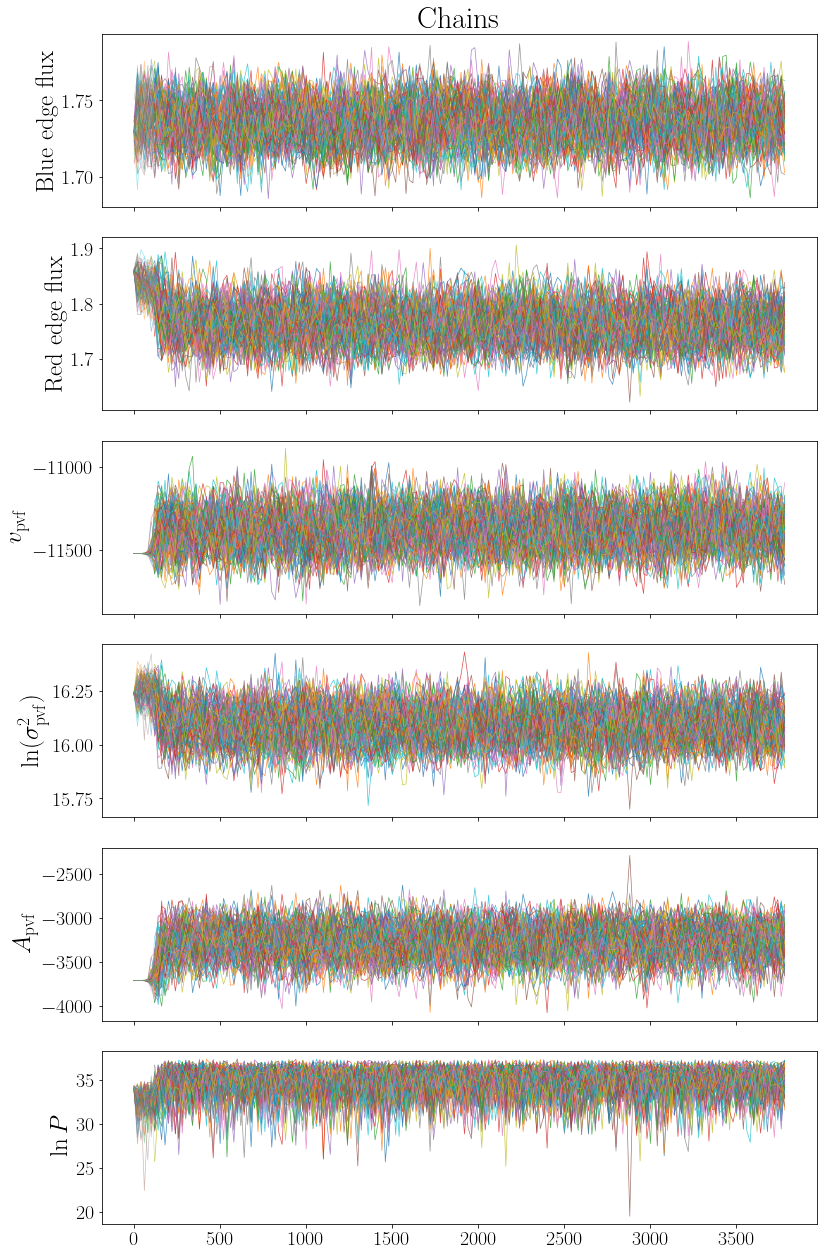

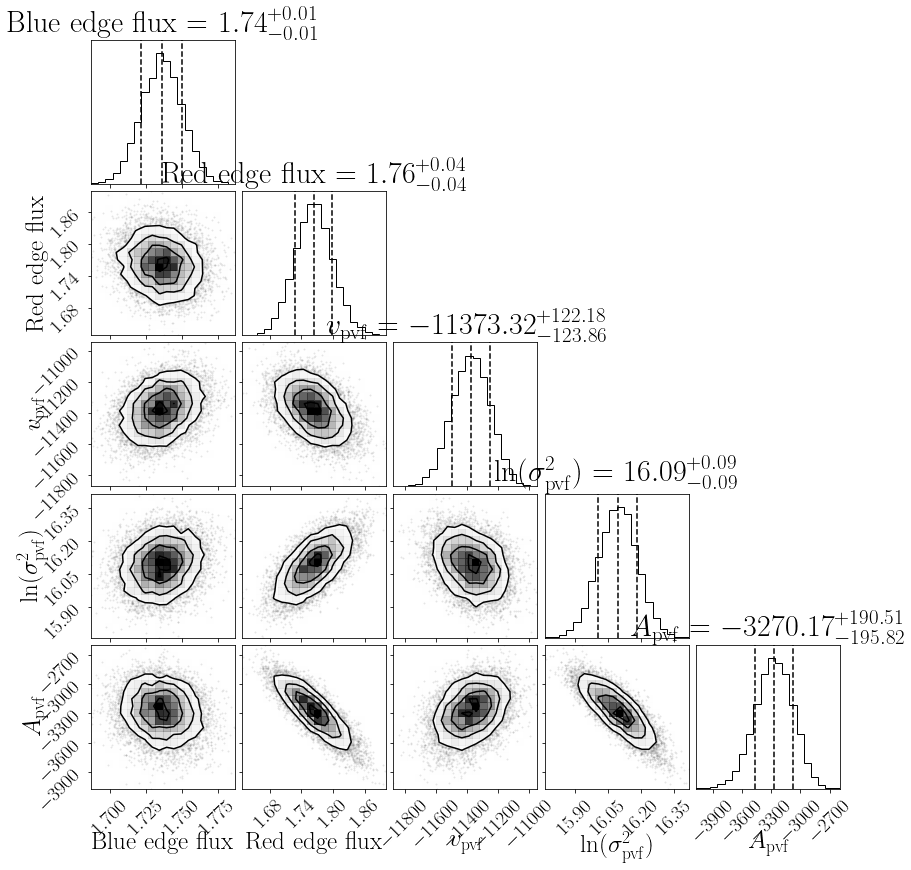

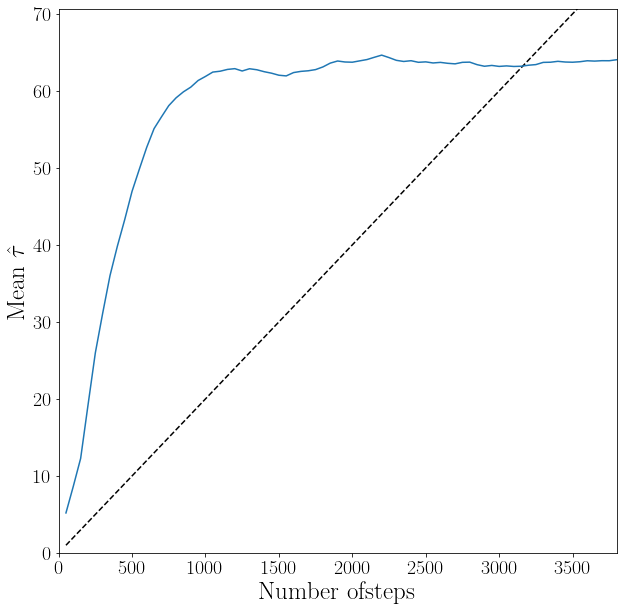

In [7]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

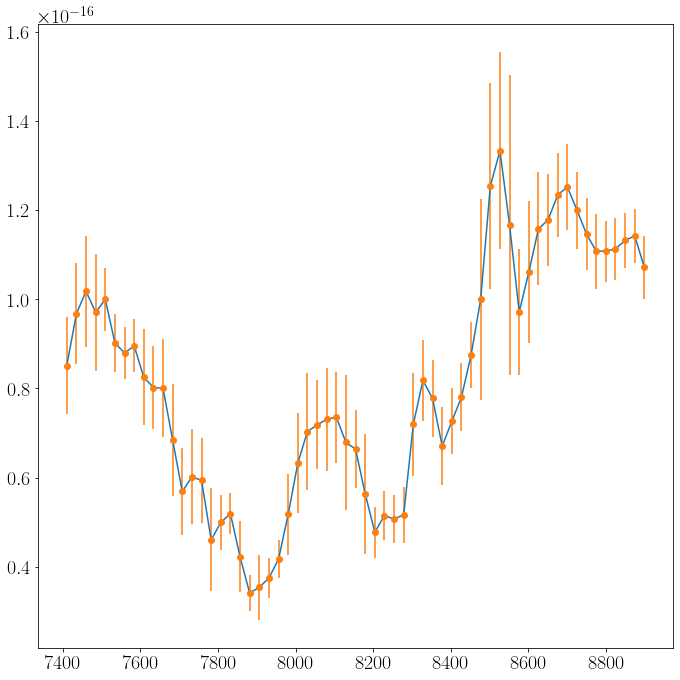

In [8]:
Spec1.plot_line_region(7400, 8900)

In [9]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

44 points within 7600.00 and 8700.00 angstroms.


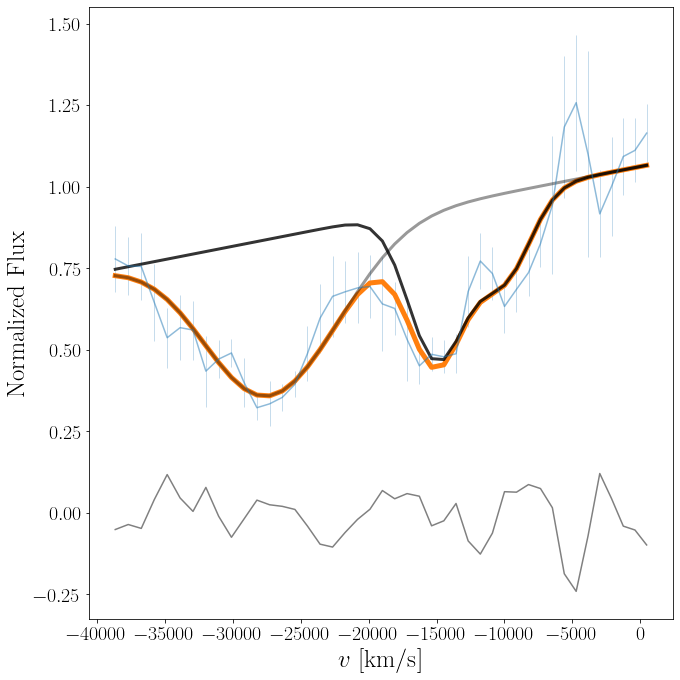

LS estimation:
Velocity pvf: -9979 km/s
Velocity hvf: -23619 km/s


In [10]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

  0%|          | 3/50000 [00:00<40:50, 20.40it/s]

MCMC results:
Velocity pvf: -11220 pm 88 km/s
Velocity hvf: -25569 pm 271 km/s


  9%|▉         | 4400/50000 [05:12<53:59, 14.08it/s]  


MCMC results:
Velocity pvf: -11223 pm 94 km/s
Velocity hvf: -25545 pm 253 km/s


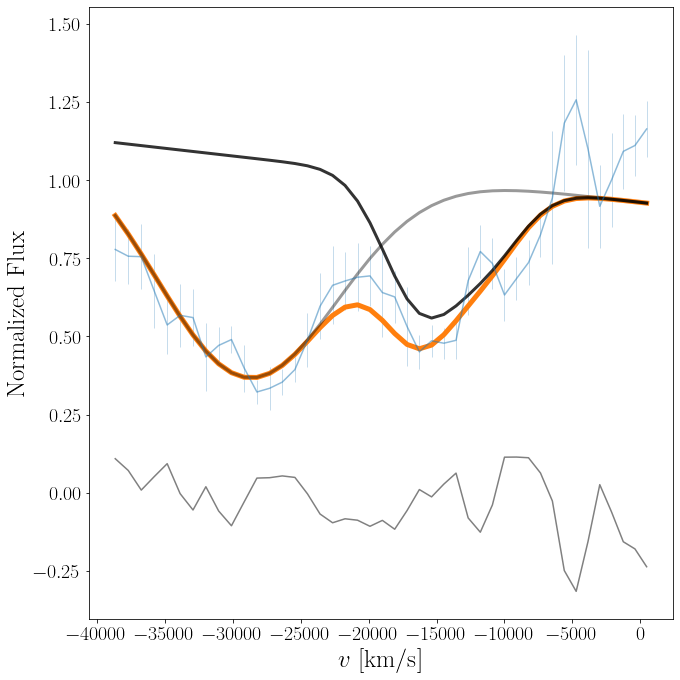

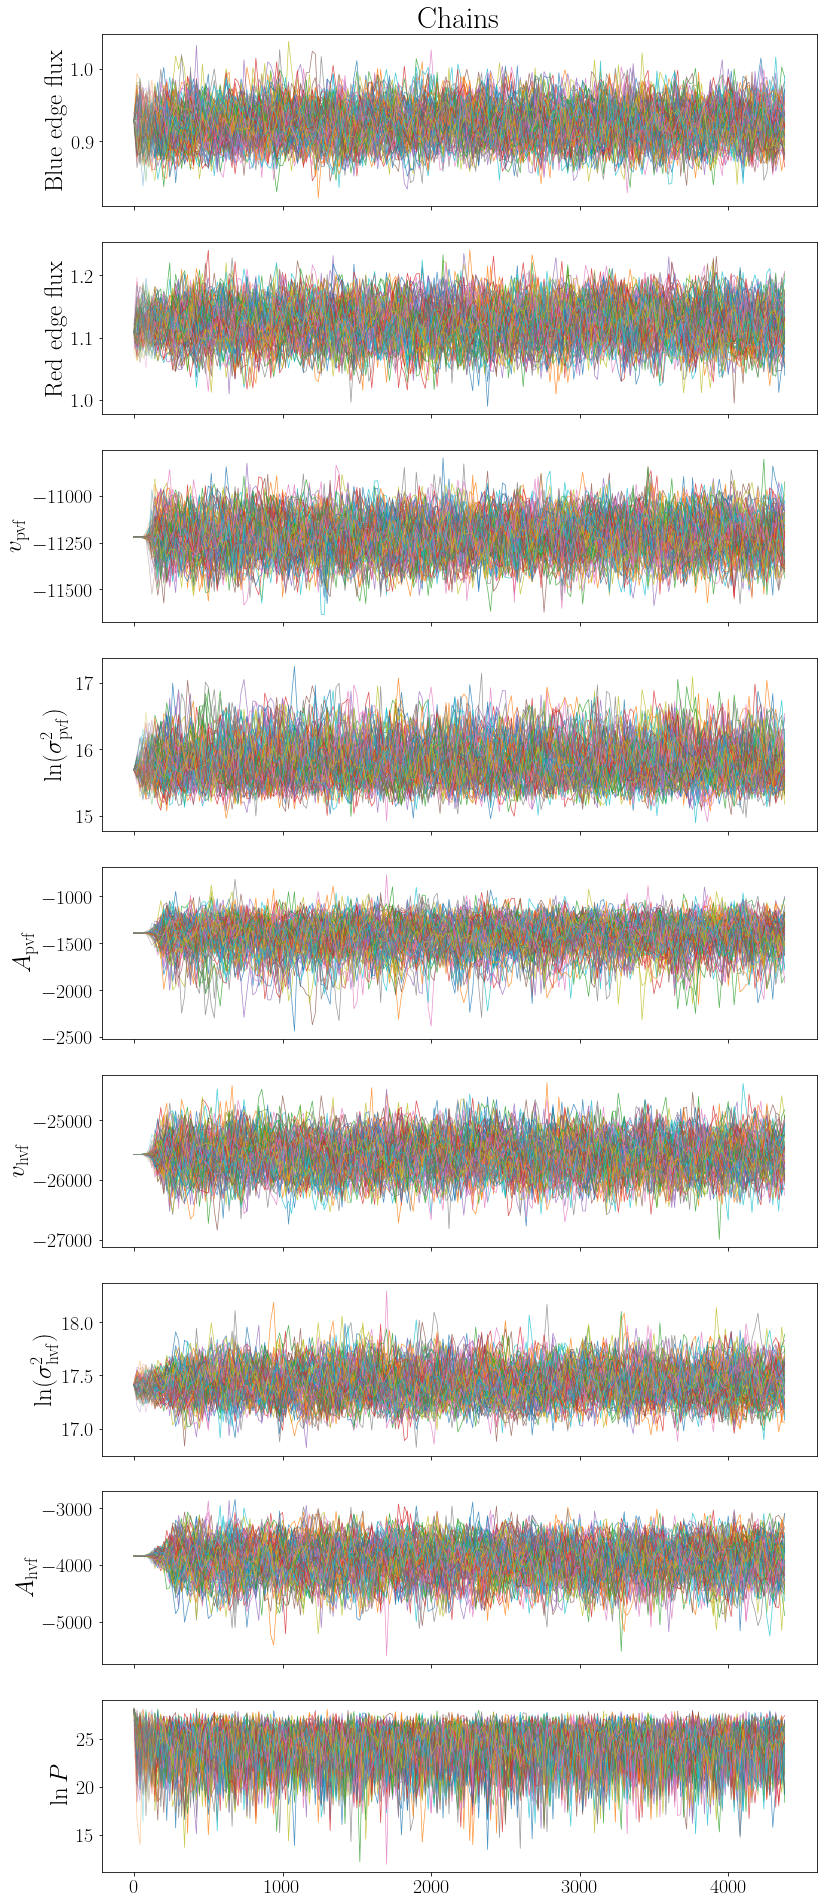

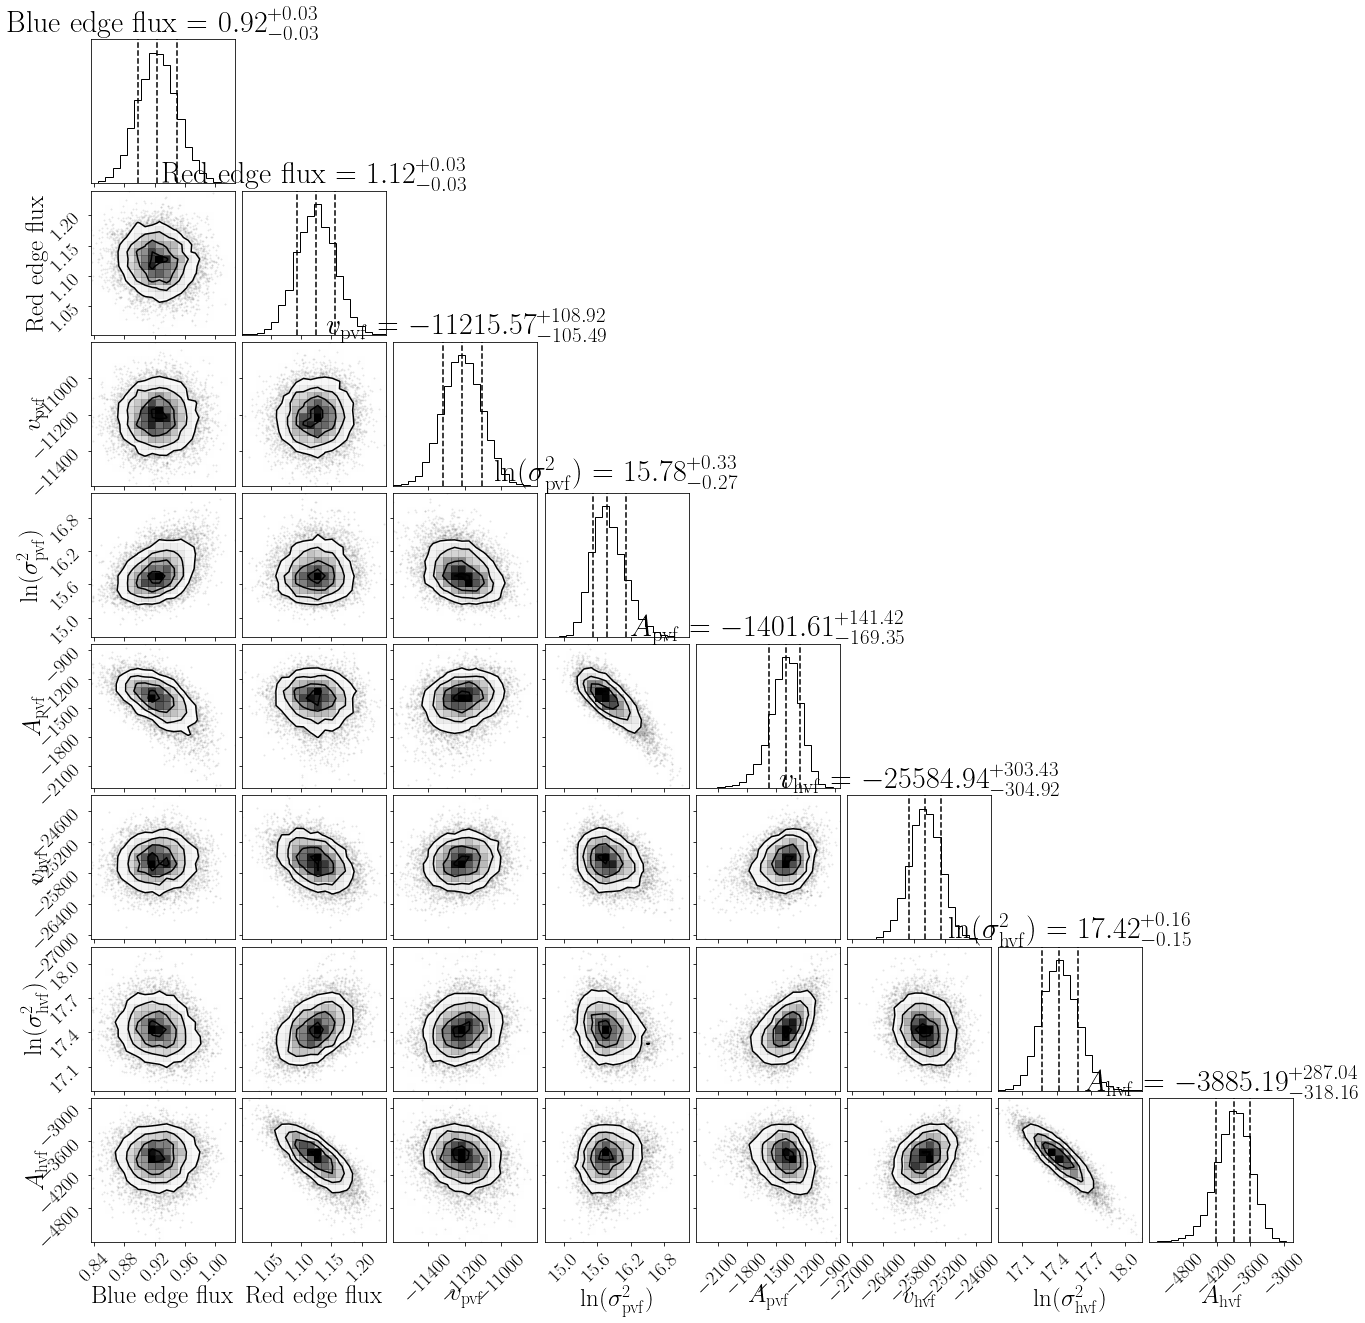

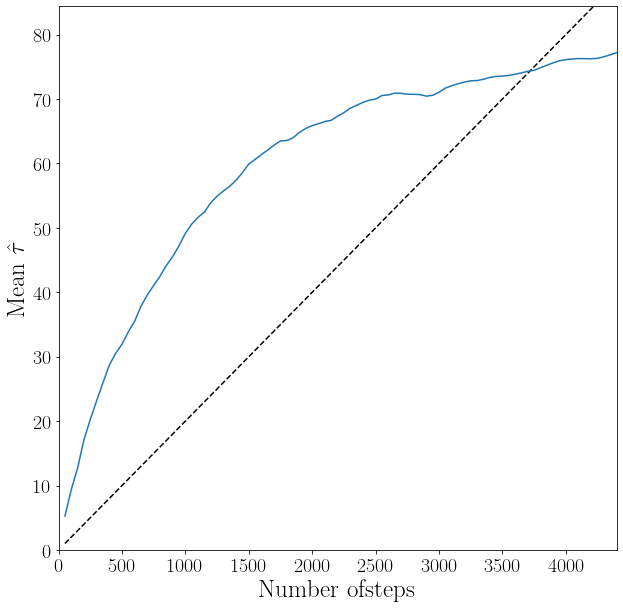

In [11]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)